#### Investimentos no SUS 2012-17
##### arquivo : investimentos-sus-2012-2017.csv

In [1]:
import os
print(os.getcwd())

C:\Users\Rosangela\Documents\data\Dados SUS\dados\covid_sus_dez2019


In [2]:
import pandas as pd
import pandas as np

In [3]:
import csv
arquivo = open('brazil-population-1998-2017.csv', encoding='latin-1')
leitor = csv.reader(arquivo)
print(next(leitor))


['code;"city";"state";"abbreviation";"region";"lat";"long";"year";"population"']


In [4]:
#Baixando dados de brasil para juntar códigos IBGE número de muncipío
brasil = pd.read_csv('brazil-population-1998-2017.csv', sep=';', encoding='utf8', usecols=['code','city','state'])
brasil.head()

,code,city,state
0,110001,Alta Floresta D'Oeste,Rondônia
1,110001,Alta Floresta D'Oeste,Rondônia
2,110001,Alta Floresta D'Oeste,Rondônia
3,110001,Alta Floresta D'Oeste,Rondônia
4,110001,Alta Floresta D'Oeste,Rondônia


In [5]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111137 entries, 0 to 111136
Data columns (total 3 columns):
code     111137 non-null int64
city     111137 non-null object
state    111137 non-null object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [6]:
df_investe = pd.read_csv('investimentos-sus-2012-2017.csv', sep=';', encoding='utf-8')
df_investe.head()

,nome,vlTotal,vlDesconto,vlLiquido,ANO,MUNICIPIO
0,ASSISTÊNCIA FARMACÊUTICA,124205.40,0.0,124205.40,2012,110001
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001
2,INVESTIMENTO,60000.00,0.0,60000.00,2012,110001
3,MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPI...,2013077.58,960.0,2012117.58,2012,110001
4,VIGILÂNCIA EM SAÚDE,246711.20,0.0,246711.20,2012,110001


In [7]:
df_investe.rename(columns={'MUNICIPIO': 'code'}, inplace=True)
df_investe.head() 

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code
0,ASSISTÊNCIA FARMACÊUTICA,124205.40,0.0,124205.40,2012,110001
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001
2,INVESTIMENTO,60000.00,0.0,60000.00,2012,110001
3,MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPI...,2013077.58,960.0,2012117.58,2012,110001
4,VIGILÂNCIA EM SAÚDE,246711.20,0.0,246711.20,2012,110001


In [8]:
df_new = df_investe.join(brasil.set_index('code'), on='code')
df_new.head(5)

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971528 entries, 0 to 148897
Data columns (total 8 columns):
nome          object
vlTotal       float64
vlDesconto    float64
vlLiquido     float64
ANO           int64
code          int64
city          object
state         object
dtypes: float64(3), int64(2), object(3)
memory usage: 204.0+ MB


In [10]:
df_new['ANO'].value_counts()

2017    510025
2013    501269
2016    494668
2012    492682
2015    491942
2014    480942
Name: ANO, dtype: int64

In [11]:
df_new['nome'].value_counts()

ATENÇÃO BÁSICA                                         666712
VIGILÂNCIA EM SAÚDE                                    666612
ASSISTÊNCIA FARMACÊUTICA                               536230
MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR    518662
INVESTIMENTO                                           499513
GESTÃO DO SUS                                           83729
Name: nome, dtype: int64

In [12]:
ab12 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2012)]
ab12.head()    

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001,Alta Floresta D'Oeste,Rondônia
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001,Alta Floresta D'Oeste,Rondônia
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001,Alta Floresta D'Oeste,Rondônia
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001,Alta Floresta D'Oeste,Rondônia
1,ATENÇÃO BÁSICA,2572117.87,0.0,2572117.87,2012,110001,Alta Floresta D'Oeste,Rondônia


In [13]:
ab12['ANO'].value_counts()

2012    111087
Name: ANO, dtype: int64

In [59]:
ab12['vlTotal'].sum().round()

266531092832.0

In [61]:
### variação percentual  valor final2017 - valor inicial2012/ valor2012 multiplicado por 100

(344213000025.0 - 266531092832.0 )/266531092832.*100


29.145532841065

#### Entre 2012 e 2017 os repasses para a rede_ab do SUS feitos pelo governo federal foram de 29%

In [15]:
#Mostrar todos os dados das cidade que mais receberam investimentos em 2012 
ab12.loc[ab12.groupby('city')['vlTotal'].idxmax()]

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás
23458,ATENÇÃO BÁSICA,642090.01,0.0,642090.01,2012,520005,Abadia de Goiás,Goiás


In [16]:
ab12.nsmallest(10, 'vlTotal')

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul
21163,ATENÇÃO BÁSICA,39748.5,0.0,39748.5,2012,431164,Linha Nova,Rio Grande do Sul


In [17]:
ab12.nlargest(10, 'vlTotal')

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo
16862,ATENÇÃO BÁSICA,4.725292e+08,0.0,4.725292e+08,2012,355030,São Paulo,São Paulo


In [18]:
ab13 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2013)]
ab13.head() 

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
24681,ATENÇÃO BÁSICA,2088973.94,0.0,2088973.94,2013,110001,Alta Floresta D'Oeste,Rondônia
24681,ATENÇÃO BÁSICA,2088973.94,0.0,2088973.94,2013,110001,Alta Floresta D'Oeste,Rondônia
24681,ATENÇÃO BÁSICA,2088973.94,0.0,2088973.94,2013,110001,Alta Floresta D'Oeste,Rondônia
24681,ATENÇÃO BÁSICA,2088973.94,0.0,2088973.94,2013,110001,Alta Floresta D'Oeste,Rondônia
24681,ATENÇÃO BÁSICA,2088973.94,0.0,2088973.94,2013,110001,Alta Floresta D'Oeste,Rondônia


In [19]:
ab13['vlTotal'].sum().round()

256709858176.0

In [20]:
ab13.nlargest(10, 'vlTotal')

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo
41898,ATENÇÃO BÁSICA,4.913835e+08,0.0,4.913835e+08,2013,355030,São Paulo,São Paulo


In [21]:
ab14 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2014)]
ab14['vlTotal'].sum().round()

283766411434.0

In [22]:
ab15 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2015)]
ab15['vlTotal'].sum().round()

305339092049.0

In [23]:
ab16 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2016)]
ab16['vlTotal'].sum().round()

334570813714.0

In [24]:
ab17 = df_new[(df_new['nome'] =='ATENÇÃO BÁSICA') & (df_new['ANO'] == 2017)]
ab17['vlTotal'].sum().round()

344213000025.0

#### criando um novo dataframe com os dados de anos e total de investimentos na Atenção Básica

In [25]:
data = {
'Ano': [2012, 2013,2014,2015,2016, 2017],
'Investimentos_AB': [266531092832.0, 256709858176.0, 283766411434.0, 305339092049.0,334570813714.0,344213000025.0]
}
#Criando o DataFrame
df = pd.DataFrame(data, columns=['Ano','Investimentos_AB']) 

In [26]:
df

,Ano,Investimentos_AB
0,2012,2.665311e+11
1,2013,2.567099e+11
2,2014,2.837664e+11
3,2015,3.053391e+11
4,2016,3.345708e+11
5,2017,3.442130e+11


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Investimentos na Atenção Básica/ SUS 2012-2107')

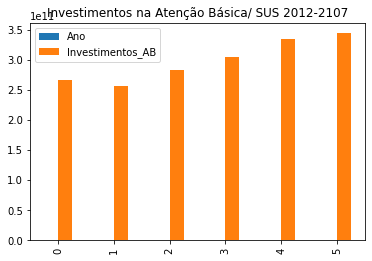

In [28]:
df.plot.bar()
plt.title('Investimentos na Atenção Básica/ SUS 2012-2107')


In [29]:
#### https://datawrapper.dwcdn.net/p7484/1/

#### Calculando o investimento anual em média e alta complexidade

In [30]:
ma12 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2012)]
ma12['vlTotal'].sum().round()

714708895203.0

In [31]:
ma13 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2013)]
ma13['vlTotal'].sum().round()

728815546257.0

In [32]:
ma14 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2014)]
ma14['vlTotal'].sum().round()

821957291088.0

In [33]:
ma15 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2015)]
ma15['vlTotal'].sum().round()

882013835267.0

In [34]:
ma16 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2016)]
ma16['vlTotal'].sum().round()

857866415342.0

In [35]:
ma17 = df_new[(df_new['nome'] =='MÉDIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR') & (df_new['ANO'] == 2017)]
ma17['vlTotal'].sum().round()

935006877383.0

In [62]:
### variação percentual  valor final2017 - valor inicial2012/ valor2012 multiplicado por 100

(935006877383.0 - 714708895203.0)/ 714708895203.0*100

30.823456047434306

### Os repasses sus para procedimentos de média e alta complexidade aumentaram 31%

In [36]:
#### Gráfico em https://datawrapper.dwcdn.net/3578X/1/

In [37]:
### Analisar e comparar todas as categorias de investimento
df_new.head(2)

,nome,vlTotal,vlDesconto,vlLiquido,ANO,code,city,state
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia
0,ASSISTÊNCIA FARMACÊUTICA,124205.4,0.0,124205.4,2012,110001,Alta Floresta D'Oeste,Rondônia


In [38]:
### Calculando o invest. em assistência farmacêutica

In [39]:
farma12 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2012)]
farma12['vlTotal'].sum().round()

39516034049.0

In [40]:
farma13 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2013)]
farma13['vlTotal'].sum().round()

37335533552.0

In [41]:
farma14 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2014)]
farma14['vlTotal'].sum().round()

36068296859.0

In [42]:
farma15 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2015)]
farma15['vlTotal'].sum().round()

35119872625.0

In [43]:
farma16 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2016)]
farma16['vlTotal'].sum().round()

39377322401.0

In [44]:
farma17 = df_new[(df_new['nome'] =='ASSISTÊNCIA FARMACÊUTICA') & (df_new['ANO'] == 2017)]
farma17['vlTotal'].sum().round()

33657878648.0

In [63]:
### variação percentual  valor final2017 - valor inicial2012/ valor2012 multiplicado por 100

(33657878648.0 - 39516034049.0)/39516034049.0*100

-14.824755423927083

#### Os repassses em assistência farmaceútica recuaram 15%

In [45]:
vigia12 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2012)]
vigia12['vlTotal'].sum().round()           

38008819224.0

In [46]:
vigia13 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2013)]
vigia13['vlTotal'].sum().round()

45191929166.0

In [47]:
vigia14 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2014)]
vigia14['vlTotal'].sum().round()

40256700259.0

In [48]:
vigia15 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2015)]
vigia15['vlTotal'].sum().round()

38721176152.0

In [49]:
vigia16 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2016)]
vigia16['vlTotal'].sum().round()

54385840617.0

In [50]:
vigia17 = df_new[(df_new['nome'] =='VIGILÂNCIA EM SAÚDE') & (df_new['ANO'] == 2017)]
vigia17['vlTotal'].sum().round()

46674418156.0

In [64]:
### variação percentual  valor final2017 - valor inicial2012/ valor2012 multiplicado por 100

(46674418156.0 - 38008819224.0)/38008819224.0*100

22.798916432868978

#### Os repasses em Vililância em Saúde cresceram 23%

In [51]:
gestao12 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2012)]
gestao12['vlTotal'].sum().round()

5377783878.0

In [52]:
gestao13 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2013)]
gestao13['vlTotal'].sum().round()

3788891544.0

In [53]:
gestao14 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2014)]
gestao14['vlTotal'].sum().round()

2328830316.0

In [54]:
gestao15 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2015)]
gestao15['vlTotal'].sum().round()

1408195363.0

In [55]:
gestao16 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2016)]
gestao16['vlTotal'].sum().round()

1260423894.0

In [56]:
gestao17 = df_new[(df_new['nome'] == 'GESTÃO DO SUS') & (df_new['ANO'] == 2017)]
gestao17['vlTotal'].sum().round()

1166936717.0

In [57]:
#### https://datawrapper.dwcdn.net/Ixore/1/